# ***Outline***

This data set is a compilation state expenditure, student demographic, and 4th and 8th grade math and reading scores. This project is trying to create a model that can predict student scores based on these features.

# ***Data***

## ***Upload Data***

In [1]:
import sys
!conda install --yes --prefix {sys.prefix} numpy

Solving environment: / 
  - anaconda/osx-64::ca-certificates-2020.1.1-0, anaconda/osx-64::certifi-2019.11.28-py37_0, anaconda/osx-64::openssl-1.1.1d-h1de35cc_4
  - anaconda/osx-64::ca-certificates-2020.1.1-0, anaconda/osx-64::openssl-1.1.1d-h1de35cc_4, defaults/osx-64::certifi-2019.11.28-py37_0
  - anaconda/osx-64::certifi-2019.11.28-py37_0, anaconda/osx-64::openssl-1.1.1d-h1de35cc_4, defaults/osx-64::ca-certificates-2020.1.1-0
  - anaconda/osx-64::openssl-1.1.1d-h1de35cc_4, defaults/osx-64::ca-certificates-2020.1.1-0, defaults/osx-64::certifi-2019.11.28-py37_0
  - anaconda/osx-64::certifi-2019.11.28-py37_0, defaults/osx-64::ca-certificates-2020.1.1-0, defaults/osx-64::openssl-1.1.1d-h1de35cc_4
  - defaults/osx-64::ca-certificates-2020.1.1-0, defaults/osx-64::certifi-2019.11.28-py37_0, defaults/osx-64::openssl-1.1.1d-h1de35cc_4
  - anaconda/osx-64::ca-certificates-2020.1.1-0, anaconda/osx-64::certifi-2019.11.28-py37_0, defaults/osx-64::openssl-1.1.1d-h1de35cc_4
  - anaconda/osx-64::ca-

In [2]:
import os

In [3]:
import pandas as pd

In [4]:
finances = pd.read_csv("https://raw.githubusercontent.com/jiobu1/Unit-2-Build-Week/main/data/finance_states.csv")
states = pd.read_csv("https://raw.githubusercontent.com/jiobu1/Unit-2-Build-Week/main/data/states_all_extended.csv")

In [5]:
states.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_TRF,GRADES_8_TRF,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,NaN,NaN,NaN,NaN,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,NaN,NaN,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,NaN,NaN,NaN,NaN,208.398961,260.892247,196.764414,NaN


In [6]:
finances.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885,304177,1659028,715680,2653798,1481703,735036,NaN,174053
1,1992_ALASKA,ALASKA,1992,NaN,1049591,106780,720711,222100,972488,498362,350902,NaN,37451
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079,297888,1369815,1590376,3401580,1435908,1007732,NaN,609114
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959,178571,958785,574603,1743022,964323,483488,NaN,145212
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025,2072470,16546514,7641041,27138832,14358922,8520926,NaN,2044688


In [7]:
states.shape, finances.shape

((1492, 193), (1326, 13))

## ***Update Data***

### ***Merging Tail***

* merging the tail of both dataframes before concating

In [8]:
state_tail = pd.DataFrame(states.tail(51))
finance_tail = pd.DataFrame(finances.tail(51)) #I just need the last 51 rows

In [9]:
state_tail.shape, finance_tail.shape

((51, 193), (51, 13))

In [10]:
columns = ['ENROLL','TOTAL_REVENUE','FEDERAL_REVENUE',
           'STATE_REVENUE','LOCAL_REVENUE','TOTAL_EXPENDITURE',
           'INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE',
           'OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE']
state_tail = state_tail.drop(columns=columns) #Dropping unnecessary columns from state_tail, so I do not have to do this later

In [11]:
merge = pd.merge(finance_tail, state_tail, on=['PRIMARY_KEY','STATE', 'YEAR'])

In [12]:
merge.shape

(51, 193)

In [13]:
merge.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_TRF,GRADES_8_TRF,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,2017_ALABAMA,ALABAMA,2017,744930.0,7911674,811407,4350594,2749673,8031412,4046379,...,NaN,NaN,NaN,NaN,NaN,NaN,232.170688,268.312020,216.419814,257.686520
1,2017_ALASKA,ALASKA,2017,132737.0,2504501,350204,1600503,553794,2587060,1266077,...,NaN,NaN,NaN,NaN,NaN,NaN,230.456278,277.015572,207.037630,257.667497
2,2017_ARIZONA,ARIZONA,2017,936147.0,8677631,1178196,3446191,4053244,8389808,4081153,...,NaN,NaN,NaN,NaN,NaN,NaN,234.435788,282.248145,215.465952,262.957457
3,2017_ARKANSAS,ARKANSAS,2017,478996.0,5481422,597260,4137903,746259,5479899,2691959,...,NaN,NaN,NaN,NaN,NaN,NaN,233.848144,273.759907,216.108026,259.955798
4,2017_CALIFORNIA,CALIFORNIA,2017,6195344.0,91803968,7889546,51046506,32867916,90161939,44748095,...,NaN,NaN,NaN,NaN,NaN,NaN,232.262941,276.638200,215.421814,262.520630


### ***Concatenating Data***

In [14]:
head = states.head(1441)

In [15]:
df = head.append(merge)

In [16]:
min(df['YEAR']), max(df['YEAR'])

(1992, 2017)

# ***Choose your evaluation metric(s)***

In [17]:
target_df = df[['PRIMARY_KEY','STATE','AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE' ]].copy()
target_df.head()

,PRIMARY_KEY,STATE,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,208.398961,260.892247,196.764414,NaN


Using 8th grade reading. Creating a classification class by grouping the scores into different categories. I think this will give more information then the numeric values.

Noticings: Unfortunately, the state scores are not very good for any of the states for any of the years. Most states, across both Math and Reading, have underperformed; only a small percentage scored proficient.

## 8th Grade Reading

### ***Data Cleaning***

In [18]:
#This code finds the mean by states and then fills in NaN values with that mean
target_df['AVG_READING_8_SCORE'] = target_df.groupby('STATE')['AVG_READING_8_SCORE'].transform(lambda x: x.fillna(x.mean()))

In [19]:
target_df['AVG_READING_8_SCORE'].isnull().sum()

161

In [20]:
target_df['AVG_READING_8_SCORE'] = target_df['AVG_READING_8_SCORE'].fillna(0)
target_df['AVG_READING_8_SCORE'] = target_df['AVG_READING_8_SCORE'].astype(int)
target_df['AVG_READING_8_SCORE']

0     264
1     258
2     262
3     264
4     261
     ... 
46    273
47    267
48    271
49    258
50    269
Name: AVG_READING_8_SCORE, Length: 1492, dtype: int64

In [21]:
target_df['AVG_READING_8_SCORE'].value_counts()

264    218
263    191
265    163
0      161
262    134
261    117
266    105
260     70
267     47
259     35
268     34
269     32
270     21
257     19
258     18
272     14
251     13
255     12
253     11
254     10
273      9
271      9
256      8
274      7
252      7
250      6
277      3
275      3
276      2
247      2
238      2
242      2
239      1
236      1
249      1
240      1
246      1
248      1
280      1
Name: AVG_READING_8_SCORE, dtype: int64

In [22]:
min(target_df['AVG_READING_8_SCORE']), max(target_df['AVG_READING_8_SCORE'])

(0, 280)

NAEP Reading Score Breakdown
- basic (0-280)
> This column was broken down into 3 categories: 
> - low, 
> - mid, and 
> - high basic
- proficient (281-322)
- advanced (323-500)

In [23]:
def proficiency(row):
  #separating basic into 3 groups (0-281)
    if 0< row['AVG_READING_8_SCORE'] < 240:
        val = '1'
    elif 240 <= row['AVG_READING_8_SCORE'] < 265:
        val = '2'
    elif 265 <= row['AVG_READING_8_SCORE'] < 281:
        val = '3'
    elif 281 <= row['AVG_READING_8_SCORE'] < 323:
        val = '4'
    elif row['AVG_READING_8_SCORE'] >= 323:
        val = '5'
    else:
        val = 0
    return val

target_df['READING_PROF_8'] = target_df.apply(proficiency, axis=1)
target_df['READING_PROF_8'].astype('int')

0     2
1     2
2     2
3     2
4     2
     ..
46    3
47    3
48    3
49    2
50    3
Name: READING_PROF_8, Length: 1492, dtype: int64

In [24]:
target_df['READING_PROF_8'].value_counts(normalize=True)

2    0.587802
3    0.301609
0    0.107909
1    0.002681
Name: READING_PROF_8, dtype: float64

## 8th Grade Math

### ***Data Cleaning***

In [25]:
#This code finds the mean by states and then fills in NaN values with that mean
target_df['AVG_MATH_8_SCORE'] = target_df.groupby('STATE')['AVG_MATH_8_SCORE'].transform(lambda x: x.fillna(x.mean()))

In [26]:
target_df['AVG_MATH_8_SCORE'].isnull().sum()

161

In [27]:
target_df['AVG_MATH_8_SCORE'] = target_df['AVG_MATH_8_SCORE'].fillna(0)
target_df['AVG_MATH_8_SCORE'] = target_df['AVG_MATH_8_SCORE'].astype(int)
target_df['AVG_MATH_8_SCORE']

0     252
1     280
2     265
3     256
4     260
     ... 
46    290
47    289
48    273
49    288
50    288
Name: AVG_MATH_8_SCORE, Length: 1492, dtype: int64

In [28]:
target_df['AVG_MATH_8_SCORE'].value_counts()

0      161
283    115
282    101
280     72
287     68
273     60
277     57
288     55
285     54
284     54
279     49
275     47
286     47
274     46
278     46
270     45
281     44
269     40
271     28
289     27
272     25
262     25
290     24
266     24
265     23
291     23
263     21
250     18
276     13
268     11
267      7
292      6
294      6
259      5
260      5
264      4
261      4
293      4
258      3
256      2
234      2
252      2
297      2
253      2
295      2
298      2
296      2
254      1
257      1
249      1
248      1
246      1
245      1
243      1
232      1
300      1
Name: AVG_MATH_8_SCORE, dtype: int64

In [29]:
min(target_df['AVG_MATH_8_SCORE']), max(target_df['AVG_MATH_8_SCORE'])

(0, 300)

NAEP Math Score Breakdown
- basic (0-298)
> This column was broken down into 3 categories:
> -  low, 
> - mid, and 
> - high basic
- proficient (298-332)
- advanced (333-500)

In [30]:
def proficiency(row):
    if 0 < row['AVG_MATH_8_SCORE'] < 270:
        val = '1'
    elif 270 <= row['AVG_MATH_8_SCORE'] < 280:
        val = '2 '
    elif 280 <= row['AVG_MATH_8_SCORE'] < 299:
        val = '3'    
    elif 299 <= row['AVG_MATH_8_SCORE'] < 333:
        val = '4'
    elif row['AVG_MATH_8_SCORE'] >= 333:
        val = '5'
    else:
        val = 0
    return val

target_df['MATH_PROF_8'] = target_df.apply(proficiency, axis=1)
target_df['MATH_PROF_8'].astype('int')

0     1
1     3
2     1
3     1
4     1
     ..
46    3
47    3
48    2
49    3
50    3
Name: MATH_PROF_8, Length: 1492, dtype: int64

In [31]:
target_df['MATH_PROF_8'].value_counts(normalize=True)

3     0.474531
2     0.278820
1     0.138070
0     0.107909
4     0.000670
Name: MATH_PROF_8, dtype: float64

# ***Target***

Adding the two new engineered features back into the dataframe

In [32]:
df = df.drop(columns = ['AVG_READING_8_SCORE', 'AVG_MATH_8_SCORE'])

In [33]:
df[['AVG_READING_8_SCORE', 'AVG_MATH_8_SCORE','READING_PROF_8', 'MATH_PROF_8']] = target_df[['AVG_READING_8_SCORE', 'AVG_MATH_8_SCORE','READING_PROF_8','MATH_PROF_8' ]].copy()
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,AVG_MATH_8_SCORE,READING_PROF_8,MATH_PROF_8
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,NaN,NaN,208.327876,207.963517,264,252,2,1
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,258,280,2,3
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,215.253932,206.212716,262,265,2,1
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,210.206028,208.634458,264,256,2,1
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,NaN,NaN,208.398961,196.764414,261,260,2,1


In [34]:
df['READING_PROF_8'] = df['READING_PROF_8'].astype(int)
df['MATH_PROF_8'] = df['MATH_PROF_8'].astype(int)

In [35]:
df.dtypes

PRIMARY_KEY             object
STATE                   object
YEAR                     int64
ENROLL                 float64
TOTAL_REVENUE          float64
                        ...   
AVG_READING_4_SCORE    float64
AVG_READING_8_SCORE      int64
AVG_MATH_8_SCORE         int64
READING_PROF_8           int64
MATH_PROF_8              int64
Length: 195, dtype: object

# ***Train/Val/Test***

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
train = df[df['YEAR'] <= 2013]
test = df[df['YEAR'] > 2013]
train.shape, test.shape

((1277, 195), (215, 195))

In [38]:
train, val = train_test_split(
    train, train_size=0.60, test_size=0.40,
    stratify=train['READING_PROF_8'], 
    random_state=42
)

train.shape, val.shape, test.shape

((766, 195), (511, 195), (215, 195))

In [39]:
train.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,AVG_MATH_8_SCORE,READING_PROF_8,MATH_PROF_8
920,2009_WISCONSIN,WISCONSIN,2009,867035.0,10991081.0,1258519.0,4785070.0,4947492.0,10880480.0,5857285.0,...,NaN,NaN,NaN,NaN,243.585254,220.135541,265,288,3,3
510,2002_ALABAMA,ALABAMA,2002,726367.0,5128559.0,508425.0,3010983.0,1609151.0,5147821.0,2720735.0,...,NaN,NaN,NaN,NaN,NaN,NaN,264,263,2,1
591,2003_NEW_JERSEY,NEW_JERSEY,2003,1350330.0,19785039.0,797717.0,8135014.0,10852308.0,19812932.0,10169992.0,...,NaN,NaN,NaN,NaN,238.776541,225.073328,264,281,2,3
834,2008_KENTUCKY,KENTUCKY,2008,666019.0,6637062.0,697220.0,3841470.0,2098372.0,6793215.0,3422359.0,...,NaN,NaN,NaN,NaN,NaN,NaN,260,274,2,2
289,1997_NORTH_DAKOTA,NORTH_DAKOTA,1997,118433.0,683331.0,75316.0,270361.0,337654.0,679692.0,351542.0,...,NaN,NaN,NaN,NaN,NaN,NaN,263,287,2,3


### ***Cleaning Data***

TO DO:
- There are several columns that do not have any data. 

**DROP**
- primary key (this is just a combination of state and year
- Since this model is trying to predict scores for each state, I will be dropping the years that do not have any recorded scores. 
- This data contains information for all 50 states, including Washington D.C, as well as US territories. Unfortunately, there is not information about expenditure for those columns, so that information will be dropped as well. 
- I will create a new dataframe which has the breakdown of demographics and then delete those columns from this dataframe. The demographics info was not captured until 2009, that will be too many np.nan values to use to build a useful model. 



In [40]:
train.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       ...
       'GRADES_12_TRF', 'GRADES_1_8_TRF', 'GRADES_9_12_TRF', 'GRADES_ALL_TRF',
       'AVG_MATH_4_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE',
       'AVG_MATH_8_SCORE', 'READING_PROF_8', 'MATH_PROF_8'],
      dtype='object', length=195)

### ***Feature Engineering***

- For this dataset, I would delete the years where the NAEP test scores are not available since that does not give anything for me to train/validate/test the data on. The data is from 1992 - 2017. The NAEP only gives information for the years 1992, 1996, 2000, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017. ✓
- I will also delete the years where I do not have the finacial information available ✓
- I am using information from the consumer price index to create new columns that adjust revenue and expenditures to reflect inflation ✓
- look at %of total revenue spent on education✓
- look at % of total expenditure spent on instruction, support other, and capital outlay✓

#### State Averages
* replacing nulls with state averages

In [41]:
train.groupby('STATE').mean()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,AVG_MATH_8_SCORE,READING_PROF_8,MATH_PROF_8
STATE,,,,,,,,,,,,,,,,,,,,,
ALABAMA,2002.900000,733965.900000,5.500469e+06,568936.200000,3.194067e+06,1.737466e+06,5.624908e+06,2.914756e+06,1.620027e+06,451126.900000,...,NaN,NaN,NaN,NaN,225.645299,210.408278,264.700000,263.000000,2.200000,1.000000
ALASKA,2004.333333,130848.733333,1.691878e+06,265068.933333,1.021510e+06,4.052985e+05,1.819245e+06,8.951511e+05,6.266891e+05,58791.533333,...,263.20,3073.800000,1166.2,4334.200000,234.186236,210.913963,263.800000,280.200000,2.333333,2.800000
AMERICAN_SAMOA,2002.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
ARIZONA,2003.176471,875459.062500,6.549546e+06,783975.470588,2.760691e+06,3.004879e+06,6.605608e+06,3.032112e+06,2.051728e+06,323763.562500,...,480.75,5919.250000,2277.0,8251.250000,227.348464,208.783949,263.176471,274.176471,2.176471,1.882353
ARKANSAS,2002.000000,437997.083333,3.259555e+06,371155.769231,2.305379e+06,5.830208e+05,3.387348e+06,1.724709e+06,1.005450e+06,254008.833333,...,188.00,2359.000000,879.5,3341.750000,226.369523,213.676209,264.538462,268.692308,2.307692,1.769231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIRGIN_ISLANDS,2003.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.00,33.000000,44.5,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
WASHINGTON,2001.866667,995417.000000,8.413861e+06,657610.466667,5.289223e+06,2.467028e+06,8.648341e+06,4.227706e+06,2.509973e+06,377268.466667,...,1753.00,17804.000000,7526.5,25543.500000,240.417536,222.917322,264.933333,284.666667,2.933333,3.000000
WEST_VIRGINIA,2002.666667,293047.888889,2.608390e+06,262479.777778,1.534276e+06,8.116347e+05,2.557555e+06,1.413668e+06,7.827014e+05,167582.555556,...,55.50,1566.500000,278.0,2077.000000,229.120583,216.162878,265.888889,269.111111,2.888889,1.222222


#### Adjustment for Inflation
I am using information from the consumer price index to create new columns that adjust expenditures to reflect inflation ✓
* https://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/
* https://www.usinflationcalculator.com/frequently-asked-questions-faqs/#HowInflationCalculatorWorks

In [42]:
import numpy as np

In [43]:
cpi = {1992: 140.3,
       1993: 144.5,
       1994: 148.2,
       1995: 152.4,
       1996: 156.9,
       1997: 160.5,
       1998: 163.0,
       1999: 166.6,
       2000: 172.2,
       2001: 177.1,
       2002: 179.9,
       2003: 184.0,
       2004: 188.9,
       2005: 195.3,
       2006: 201.6,
       2007: 207.3,
       2008: 215.303,
       2009: 214.537,
       2010: 218.056,
       2011: 224.939,
       2012: 229.594,
       2013: 232.957,
       2014: 236.736,
       2015: 237.017,
       2016: 240.007,
       2017: 245.120,
       2018: 251.107,
       2019: 255.657}

In [44]:
baseline_year = 2019
baseline_inflation = cpi[baseline_year]
print(baseline_inflation)

255.657


In [45]:
def inflation_adjustment(row, baseline_inflation, src):
    return row[src] * (baseline_inflation/ cpi[row['YEAR']])

### ***Wrangle***

In [46]:
import numpy as np

In [47]:
def wrangle(X):
    # Prevent SettingWithCopyWarning
    X = X.copy()

    X = X.replace (0, np.NaN)

    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.
    cols_with_zeros = ['AVG_MATH_8_SCORE','AVG_READING_8_SCORE']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)

    #Dropping rows if they do not contain any score data, will not drop if there is just 1 value
    X = X.dropna(axis=0, subset=['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'], how = 'any')

    #Dropping rows that do not contain any financial information
    X = X.dropna(axis=0, subset = ['TOTAL_REVENUE','FEDERAL_REVENUE','STATE_REVENUE','LOCAL_REVENUE','TOTAL_EXPENDITURE'], how = 'all')

    #Dropping columns
    #Primary Key is just State and Year
    #Dropping breakdown of demographics into male/female because this does not start to get recorded until 2009
    drop = ['PRIMARY_KEY',
            'GRADES_PK_HP','GRADES_KG_HP','GRADES_4_HP','GRADES_8_HP','GRADES_12_HP', 'GRADES_1_8_HP', 'GRADES_9_12_HP', 'GRADES_ALL_HP',
            'GRADES_PK_TR','GRADES_KG_TR','GRADES_4_TR','GRADES_8_TR','GRADES_12_TR', 'GRADES_1_8_TR', 'GRADES_9_12_TR', 'GRADES_ALL_TR',
            'GRADES_PK_AMM','GRADES_KG_AMM','GRADES_4_AMM','GRADES_8_AMM','GRADES_12_AMM', 'GRADES_1_8_AMM', 'GRADES_9_12_AMM', 'GRADES_ALL_AMM',
            'GRADES_PK_AMF','GRADES_KG_AMF','GRADES_4_AMF','GRADES_8_AMF','GRADES_12_AMF', 'GRADES_1_8_AMF', 'GRADES_9_12_AMF', 'GRADES_ALL_AMF',
            'GRADES_PK_ASM','GRADES_KG_ASM','GRADES_4_ASM','GRADES_8_ASM','GRADES_12_ASM', 'GRADES_1_8_ASM', 'GRADES_9_12_ASM', 'GRADES_ALL_ASM',
            'GRADES_PK_ASF','GRADES_KG_ASF','GRADES_4_ASF','GRADES_8_ASF','GRADES_12_ASF', 'GRADES_1_8_ASF', 'GRADES_9_12_ASF', 'GRADES_ALL_ASF',
            'GRADES_PK_HIM','GRADES_KG_HIM','GRADES_4_HIM','GRADES_8_HIM','GRADES_12_HIM', 'GRADES_1_8_HIM', 'GRADES_9_12_HIM', 'GRADES_ALL_HIM',
            'GRADES_PK_HIF','GRADES_KG_HIF','GRADES_4_HIF','GRADES_8_HIF','GRADES_12_HIF', 'GRADES_1_8_HIF', 'GRADES_9_12_HIF', 'GRADES_ALL_HIF',
            'GRADES_PK_BLM','GRADES_KG_BLM','GRADES_4_BLM','GRADES_8_BLM','GRADES_12_BLM', 'GRADES_1_8_BLM', 'GRADES_9_12_BLM', 'GRADES_ALL_BLM',
            'GRADES_PK_BLF','GRADES_KG_BLF','GRADES_4_BLF','GRADES_8_BLF','GRADES_12_BLF', 'GRADES_1_8_BLF', 'GRADES_9_12_BLF', 'GRADES_ALL_BLF',
            'GRADES_PK_WHM','GRADES_KG_WHM','GRADES_4_WHM','GRADES_8_WHM','GRADES_12_WHM', 'GRADES_1_8_WHM', 'GRADES_9_12_WHM', 'GRADES_ALL_WHM',
            'GRADES_PK_WHF','GRADES_KG_WHF','GRADES_4_WHF','GRADES_8_WHF','GRADES_12_WHF', 'GRADES_1_8_WHF', 'GRADES_9_12_WHF', 'GRADES_ALL_WHF',
            'GRADES_PK_HPM','GRADES_KG_HPM','GRADES_4_HPM','GRADES_8_HPM','GRADES_12_HPM', 'GRADES_1_8_HPM', 'GRADES_9_12_HPM', 'GRADES_ALL_HPM',
            'GRADES_PK_HPF','GRADES_KG_HPF','GRADES_4_HPF','GRADES_8_HPF','GRADES_12_HPF', 'GRADES_1_8_HPF', 'GRADES_9_12_HPF', 'GRADES_ALL_HPF',
            'GRADES_PK_TRM','GRADES_KG_TRM','GRADES_4_TRM','GRADES_8_TRM','GRADES_12_TRM', 'GRADES_1_8_TRM', 'GRADES_9_12_TRM', 'GRADES_ALL_TRM',
            'GRADES_PK_TRF','GRADES_KG_TRF','GRADES_4_TRF','GRADES_8_TRF','GRADES_12_TRF', 'GRADES_1_8_TRF', 'GRADES_9_12_TRF', 'GRADES_ALL_TRF']
    X = X.drop(columns=drop)

    #Filling missing scores with state average
    X['AVG_READING_8_SCORE'] = X.groupby('STATE')['AVG_READING_8_SCORE'].transform(lambda x: x.fillna(x.mean()))
    X['AVG_MATH_8_SCORE'] = X.groupby('STATE')['AVG_MATH_8_SCORE'].transform(lambda x: x.fillna(x.mean()))
    X['AVG_READING_4_SCORE'] = X.groupby('STATE')['AVG_READING_4_SCORE'].transform(lambda x: x.fillna(x.mean()))
    X['AVG_MATH_4_SCORE'] = X.groupby('STATE')['AVG_MATH_4_SCORE'].transform(lambda x: x.fillna(x.mean()))

    #Adjusting revenue and expenditures to reflect inflation
    #Revenue
    X['ADJUSTED_TOTAL_REVENUE'] = X.apply(lambda row: inflation_adjustment(row,baseline_inflation, 'TOTAL_REVENUE'),axis=1)
    X['ADJUSTED_FEDERAL_REVENUE'] = X.apply(lambda row: inflation_adjustment(row,baseline_inflation, 'FEDERAL_REVENUE'),axis=1)
    X['ADJUSTED_STATE_REVENUE'] = X.apply(lambda row: inflation_adjustment(row,baseline_inflation, 'STATE_REVENUE'),axis=1)
    X['ADJUSTED_LOCAL_REVENUE'] = X.apply(lambda row: inflation_adjustment(row,baseline_inflation, 'LOCAL_REVENUE'),axis=1)

    #Expenditures
    X['ADJUSTED_TOTAL_EXPENDITURE'] = X.apply(lambda row: inflation_adjustment(row,baseline_inflation, 'TOTAL_EXPENDITURE'),axis=1)
    X['ADJUSTED_INSTRUCTION_EXPENDITURE'] = X.apply(lambda row: inflation_adjustment(row,baseline_inflation, 'INSTRUCTION_EXPENDITURE'),axis=1)
    X['ADJUSTED_SUPPORT_SERVICES_EXPENDITURE'] = X.apply(lambda row: inflation_adjustment(row,baseline_inflation, 'SUPPORT_SERVICES_EXPENDITURE'),axis=1)
    X['ADJUSTED_OTHER_EXPENDITURE'] = X.apply(lambda row: inflation_adjustment(row,baseline_inflation, 'OTHER_EXPENDITURE'),axis=1)
    X['ADJUSTED_CAPITAL_OUTLAY_EXPENDITURE'] = X.apply(lambda row: inflation_adjustment(row,baseline_inflation, 'CAPITAL_OUTLAY_EXPENDITURE'),axis=1)
    
    #Calculating Percentages
    #%of total revenue spent on education
    X['%TOTAL_REVENUE'] = X['TOTAL_EXPENDITURE']/X['TOTAL_REVENUE']

    #% of total expenditure spent on instruction
    X['%TOTAL_EXPENDITURE_INSTRUCTION'] = X['INSTRUCTION_EXPENDITURE']/X['TOTAL_EXPENDITURE']
    X['%TOTAL_EXPENDITURE_SUPPORT_SERVICES'] = X['SUPPORT_SERVICES_EXPENDITURE']/X['TOTAL_EXPENDITURE']
    X['%TOTAL_EXPENDITURE_OTHER'] = X['OTHER_EXPENDITURE']/X['TOTAL_EXPENDITURE']
    X['%TOTAL_EXPENDITURE_CAPITAL_OUTLAY'] = X['CAPITAL_OUTLAY_EXPENDITURE']/X['TOTAL_EXPENDITURE']
    
    #Cost per student
    # Used the enroll column - this is derived from the US Census
    # instead of the GRADES_ALL_G which is recorded by NAEP
    X['COST_PER_STUDENT'] = X['TOTAL_EXPENDITURE']/X['ENROLL']
    
    
    #Dropping columns that are redundant
    #Dropping features such as student breakdown because these do not add up
    drop2 = ['TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE',
             'LOCAL_REVENUE', 'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
             'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', 
             'CAPITAL_OUTLAY_EXPENDITURE', 
             'GRADES_PK_AM','GRADES_KG_AM', 'GRADES_4_AM', 'GRADES_8_AM', 
             'GRADES_12_AM','GRADES_1_8_AM','GRADES_9_12_AM','GRADES_ALL_AM', 
             'GRADES_PK_AS','GRADES_KG_AS', 'GRADES_4_AS', 'GRADES_8_AS', 
             'GRADES_12_AS','GRADES_1_8_AS','GRADES_9_12_AS','GRADES_ALL_AS', 
             'GRADES_PK_HI','GRADES_KG_HI', 'GRADES_4_HI', 'GRADES_8_HI', 
             'GRADES_12_HI','GRADES_1_8_HI','GRADES_9_12_HI','GRADES_ALL_HI',
             'GRADES_PK_BL','GRADES_KG_BL', 'GRADES_4_BL', 'GRADES_8_BL', 
             'GRADES_12_BL','GRADES_1_8_BL','GRADES_9_12_BL','GRADES_ALL_BL', 
             'GRADES_PK_WH','GRADES_KG_WH', 'GRADES_4_WH', 'GRADES_8_WH', 
             'GRADES_12_WH','GRADES_1_8_WH','GRADES_9_12_WH', 'GRADES_ALL_WH']
    X = X.drop(columns=drop2)
    
    #Return the wrangled dataframe
    return X

In [48]:
train = wrangle(train)
val = wrangle(val)
test = wrangle(test) 

train.shape, val.shape, test.shape

((251, 32), (171, 32), (102, 32))

In [49]:
train.head()

,STATE,YEAR,ENROLL,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,...,ADJUSTED_INSTRUCTION_EXPENDITURE,ADJUSTED_SUPPORT_SERVICES_EXPENDITURE,ADJUSTED_OTHER_EXPENDITURE,ADJUSTED_CAPITAL_OUTLAY_EXPENDITURE,%TOTAL_REVENUE,%TOTAL_EXPENDITURE_INSTRUCTION,%TOTAL_EXPENDITURE_SUPPORT_SERVICES,%TOTAL_EXPENDITURE_OTHER,%TOTAL_EXPENDITURE_CAPITAL_OUTLAY,COST_PER_STUDENT
920,WISCONSIN,2009,867035.0,47054.0,61094.0,61242.0,61748.0,71242.0,485288.0,279000.0,...,6.979942e+06,4.030842e+06,5.640108e+05,7.731629e+05,0.989937,0.538330,0.310880,0.043499,0.059630,12.549067
591,NEW_JERSEY,2003,1350330.0,22746.0,93201.0,99937.0,103603.0,84539.0,811469.0,382910.0,...,1.413060e+07,8.932715e+06,9.410234e+05,2.259859e+06,1.001410,0.513301,0.324485,0.034183,0.082090,14.672659
1013,RHODE_ISLAND,2011,139157.0,1979.0,10164.0,10827.0,11146.0,10558.0,85516.0,45195.0,...,1.432091e+06,8.372491e+05,1.066322e+05,4.969729e+04,0.993938,0.573013,0.335003,0.042666,0.019885,15.801864
596,OHIO,2003,1803966.0,26151.0,134036.0,136776.0,147064.0,127993.0,1118015.0,567226.0,...,1.244770e+07,8.472245e+06,1.112844e+06,3.229254e+06,1.041149,0.477542,0.325028,0.042693,0.123887,10.399420
1104,NEVADA,2013,431776.0,4707.0,35073.0,33827.0,34541.0,31450.0,278662.0,132564.0,...,2.259128e+06,1.533026e+06,1.830688e+05,2.438090e+05,0.982004,0.507349,0.344283,0.041113,0.054754,9.397102


In [50]:
min(train['YEAR']), max(train['YEAR'])

(1992, 2013)

In [51]:
train.STATE.nunique(), val.STATE.nunique(), test.STATE.nunique()

(51, 50, 51)

### ***Baseline***

In [52]:
train['READING_PROF_8'].value_counts(normalize=True)

2.0    0.505976
3.0    0.486056
1.0    0.007968
Name: READING_PROF_8, dtype: float64

My baseline is ~50% for my majority class 2

### ***Make Exploratory Visuals***

In [53]:
!pip install plotly

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [55]:
train.describe()

,YEAR,ENROLL,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,...,ADJUSTED_INSTRUCTION_EXPENDITURE,ADJUSTED_SUPPORT_SERVICES_EXPENDITURE,ADJUSTED_OTHER_EXPENDITURE,ADJUSTED_CAPITAL_OUTLAY_EXPENDITURE,%TOTAL_REVENUE,%TOTAL_EXPENDITURE_INSTRUCTION,%TOTAL_EXPENDITURE_SUPPORT_SERVICES,%TOTAL_EXPENDITURE_OTHER,%TOTAL_EXPENDITURE_CAPITAL_OUTLAY,COST_PER_STUDENT
count,251.000000,2.280000e+02,250.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02,2.510000e+02,2.500000e+02,...,2.510000e+02,2.510000e+02,2.280000e+02,2.510000e+02,251.000000,251.000000,251.000000,228.000000,251.000000,228.000000
mean,2004.278884,9.221469e+05,19714.308000,68791.151394,69407.844622,69809.729084,59556.474104,5.595880e+05,2.703565e+05,8.526096e+05,...,6.415300e+06,3.577021e+06,5.720860e+05,1.228385e+06,1.009119,0.520349,0.297510,0.048009,0.093849,10.805923
std,6.267528,1.104017e+06,32599.860715,81978.476246,83005.830224,81914.144251,69332.773874,6.646375e+05,3.190616e+05,1.009260e+06,...,8.121095e+06,4.287242e+06,7.060246e+05,1.848903e+06,0.042999,0.042654,0.033039,0.015775,0.038745,3.871063
min,1992.000000,4.419900e+04,91.000000,4528.000000,3423.000000,2860.000000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,...,3.940824e+05,2.775965e+05,3.430584e+04,2.495400e+04,0.770797,0.370584,0.219196,0.022821,0.009717,4.504998
25%,2000.000000,2.516430e+05,2478.250000,18540.000000,19412.000000,19839.500000,16846.500000,1.555985e+05,7.692450e+04,2.459892e+05,...,1.638953e+06,9.048801e+05,1.472661e+05,2.464475e+05,0.982916,0.493872,0.277134,0.037143,0.066548,8.089635
50%,2005.000000,6.256170e+05,9796.000000,46140.000000,47018.000000,46276.000000,39157.000000,3.765590e+05,1.765920e+05,5.829590e+05,...,3.435704e+06,2.047719e+06,3.844172e+05,6.191043e+05,1.005406,0.518250,0.296254,0.043668,0.090421,10.290626
75%,2009.000000,9.788888e+05,25889.750000,80528.500000,78652.500000,79659.000000,70453.500000,6.419460e+05,3.000090e+05,9.562330e+05,...,7.093683e+06,3.994671e+06,6.387642e+05,1.235068e+06,1.033133,0.549364,0.316547,0.054243,0.119776,12.364053
max,2013.000000,6.307022e+06,249524.000000,471058.000000,493415.000000,500143.000000,478503.000000,3.929869e+06,1.997064e+06,5.926631e+06,...,4.253322e+07,2.585167e+07,4.479927e+06,1.338325e+07,1.185742,0.644874,0.500568,0.106243,0.251571,29.348515


In [56]:
train.corr()

,YEAR,ENROLL,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,...,ADJUSTED_INSTRUCTION_EXPENDITURE,ADJUSTED_SUPPORT_SERVICES_EXPENDITURE,ADJUSTED_OTHER_EXPENDITURE,ADJUSTED_CAPITAL_OUTLAY_EXPENDITURE,%TOTAL_REVENUE,%TOTAL_EXPENDITURE_INSTRUCTION,%TOTAL_EXPENDITURE_SUPPORT_SERVICES,%TOTAL_EXPENDITURE_OTHER,%TOTAL_EXPENDITURE_CAPITAL_OUTLAY,COST_PER_STUDENT
YEAR,1.000000,0.000634,0.199790,0.029975,0.023505,0.038056,0.092826,0.023873,0.058666,0.037012,...,0.111662,0.130765,0.025219,0.076770,-0.082494,-0.110655,0.218244,-0.139297,-0.050153,0.613085
ENROLL,0.000634,1.000000,0.796224,0.996591,0.998478,0.998822,0.988334,0.998920,0.997106,0.999420,...,0.914499,0.949819,0.982915,0.942519,0.139001,-0.090273,-0.192797,-0.034219,0.173979,0.013318
GRADES_PK_G,0.199790,0.796224,1.000000,0.793980,0.790682,0.785321,0.771150,0.790550,0.775735,0.798814,...,0.686048,0.730423,0.750286,0.761147,0.095748,-0.129920,-0.102724,-0.027377,0.153003,0.058190
GRADES_KG_G,0.029975,0.996591,0.793980,1.000000,0.997865,0.994874,0.980305,0.998145,0.991181,0.997149,...,0.894914,0.931277,0.979440,0.926799,0.134718,-0.101733,-0.192580,-0.013421,0.189859,-0.008212
GRADES_4_G,0.023505,0.998478,0.790682,0.997865,1.000000,0.997654,0.983605,0.999800,0.993906,0.998999,...,0.901073,0.937761,0.979605,0.935640,0.135299,-0.102052,-0.193185,-0.027524,0.189302,-0.001380
GRADES_8_G,0.038056,0.998822,0.785321,0.994874,0.997654,1.000000,0.989643,0.998428,0.997777,0.999148,...,0.911619,0.949158,0.982258,0.942238,0.138939,-0.102682,-0.193116,-0.037518,0.185557,0.012045
GRADES_12_G,0.092826,0.988334,0.771150,0.980305,0.983605,0.989643,1.000000,0.984317,0.996075,0.988828,...,0.921823,0.963463,0.979840,0.944189,0.124729,-0.106800,-0.177373,-0.059126,0.163085,0.062268
GRADES_1_8_G,0.023873,0.998920,0.790550,0.998145,0.999800,0.998428,0.984317,1.000000,0.994713,0.999384,...,0.903135,0.939592,0.980332,0.935328,0.137114,-0.101091,-0.193997,-0.027896,0.188047,-0.000681
GRADES_9_12_G,0.058666,0.997106,0.775735,0.991181,0.993906,0.997777,0.996075,0.994713,1.000000,0.997089,...,0.921877,0.959053,0.984138,0.946969,0.133157,-0.100575,-0.188867,-0.048594,0.176933,0.035595
GRADES_ALL_G,0.037012,0.999420,0.798814,0.997149,0.998999,0.999148,0.988828,0.999384,0.997089,1.000000,...,0.908931,0.946226,0.981540,0.940642,0.136399,-0.101943,-0.191286,-0.037943,0.186874,0.009395


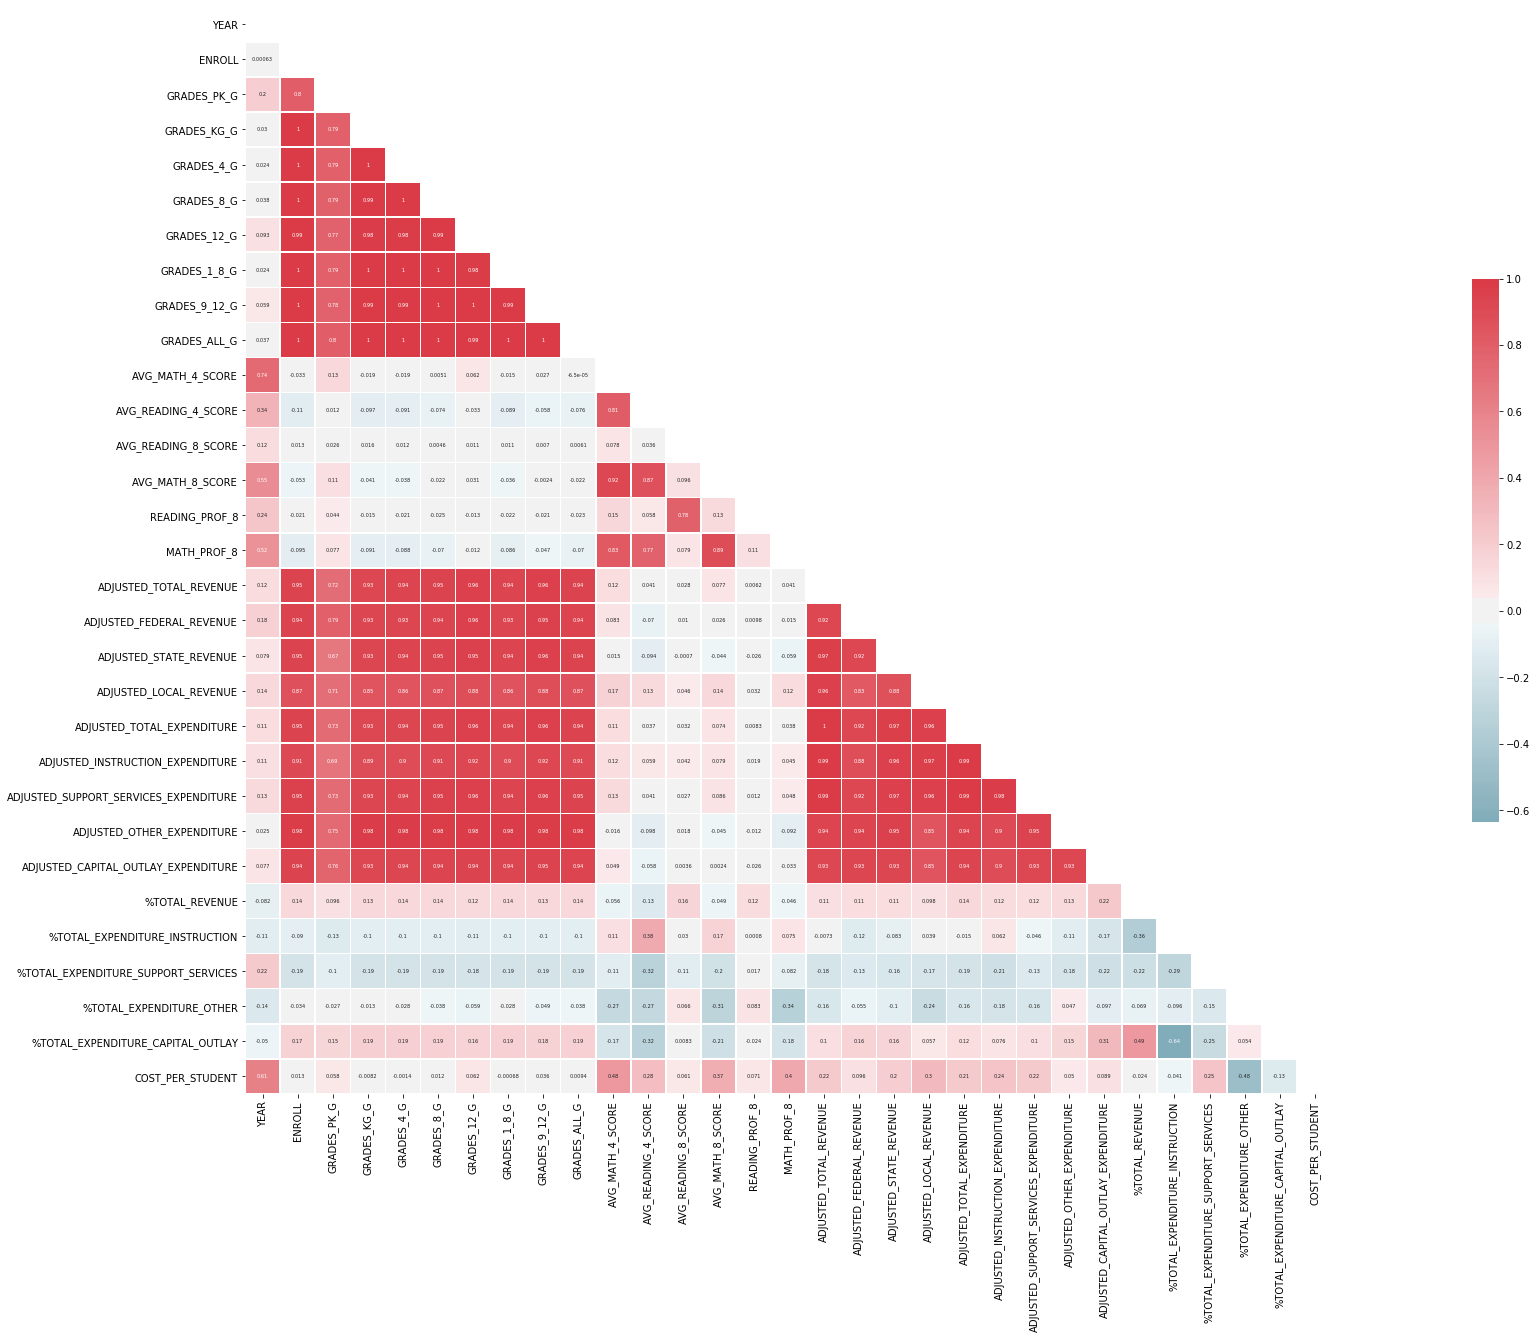

In [57]:
# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(50, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, annot=True, annot_kws={"size": 5},
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### *Predictive Power Score*
https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598
https://github.com/8080labs/ppscore/blob/master/examples/titanic_dataset.ipynb

In [58]:
!pip install ppscore

In [59]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
import ppscore as pps
matrix = pps.matrix(train)
matrix

,STATE,YEAR,ENROLL,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,...,ADJUSTED_INSTRUCTION_EXPENDITURE,ADJUSTED_SUPPORT_SERVICES_EXPENDITURE,ADJUSTED_OTHER_EXPENDITURE,ADJUSTED_CAPITAL_OUTLAY_EXPENDITURE,%TOTAL_REVENUE,%TOTAL_EXPENDITURE_INSTRUCTION,%TOTAL_EXPENDITURE_SUPPORT_SERVICES,%TOTAL_EXPENDITURE_OTHER,%TOTAL_EXPENDITURE_CAPITAL_OUTLAY,COST_PER_STUDENT
STATE,1.000000,0.000000,0.454119,0.081463,0.265534,0.417916,0.320081,0.262708,0.414143,0.307222,...,0.161936,0.114823,0.249525,0.106232,0.037638,0.074643,0.070379,0.111533,0.040259,0.032001
YEAR,0.000000,1.000000,0.038571,0.056734,0.026872,0.028710,0.033713,0.055769,0.038508,0.038879,...,0.082581,0.101239,0.022911,0.058979,0.088629,0.089780,0.130405,0.106230,0.067706,0.122566
ENROLL,0.864960,0.000000,1.000000,0.257057,0.896061,0.930887,0.938561,0.854973,0.943192,0.921007,...,0.586047,0.585123,0.770845,0.606991,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GRADES_PK_G,0.614744,0.000000,0.525412,1.000000,0.492010,0.523112,0.476812,0.413229,0.528055,0.498397,...,0.337324,0.198821,0.512954,0.105943,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GRADES_KG_G,0.906303,0.000000,0.904382,0.281971,1.000000,0.919725,0.884994,0.780940,0.923062,0.869974,...,0.478760,0.551789,0.756486,0.569421,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GRADES_4_G,0.916853,0.000000,0.920552,0.284369,0.914895,1.000000,0.912079,0.808351,0.962094,0.882621,...,0.492372,0.566488,0.748433,0.573677,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GRADES_8_G,0.888206,0.000000,0.918470,0.273477,0.862742,0.896683,1.000000,0.825930,0.912896,0.908276,...,0.517543,0.601883,0.750212,0.582728,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GRADES_12_G,0.805222,0.000000,0.806560,0.262684,0.730195,0.780613,0.809768,1.000000,0.783277,0.888740,...,0.550505,0.629275,0.700623,0.537446,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GRADES_1_8_G,0.920947,0.000000,0.929690,0.282138,0.918532,0.960624,0.926008,0.810263,1.000000,0.887499,...,0.497144,0.569936,0.752796,0.574251,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GRADES_9_12_G,0.861940,0.000000,0.895522,0.275054,0.817048,0.863272,0.901119,0.884683,0.866301,1.000000,...,0.546521,0.635943,0.742761,0.584444,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


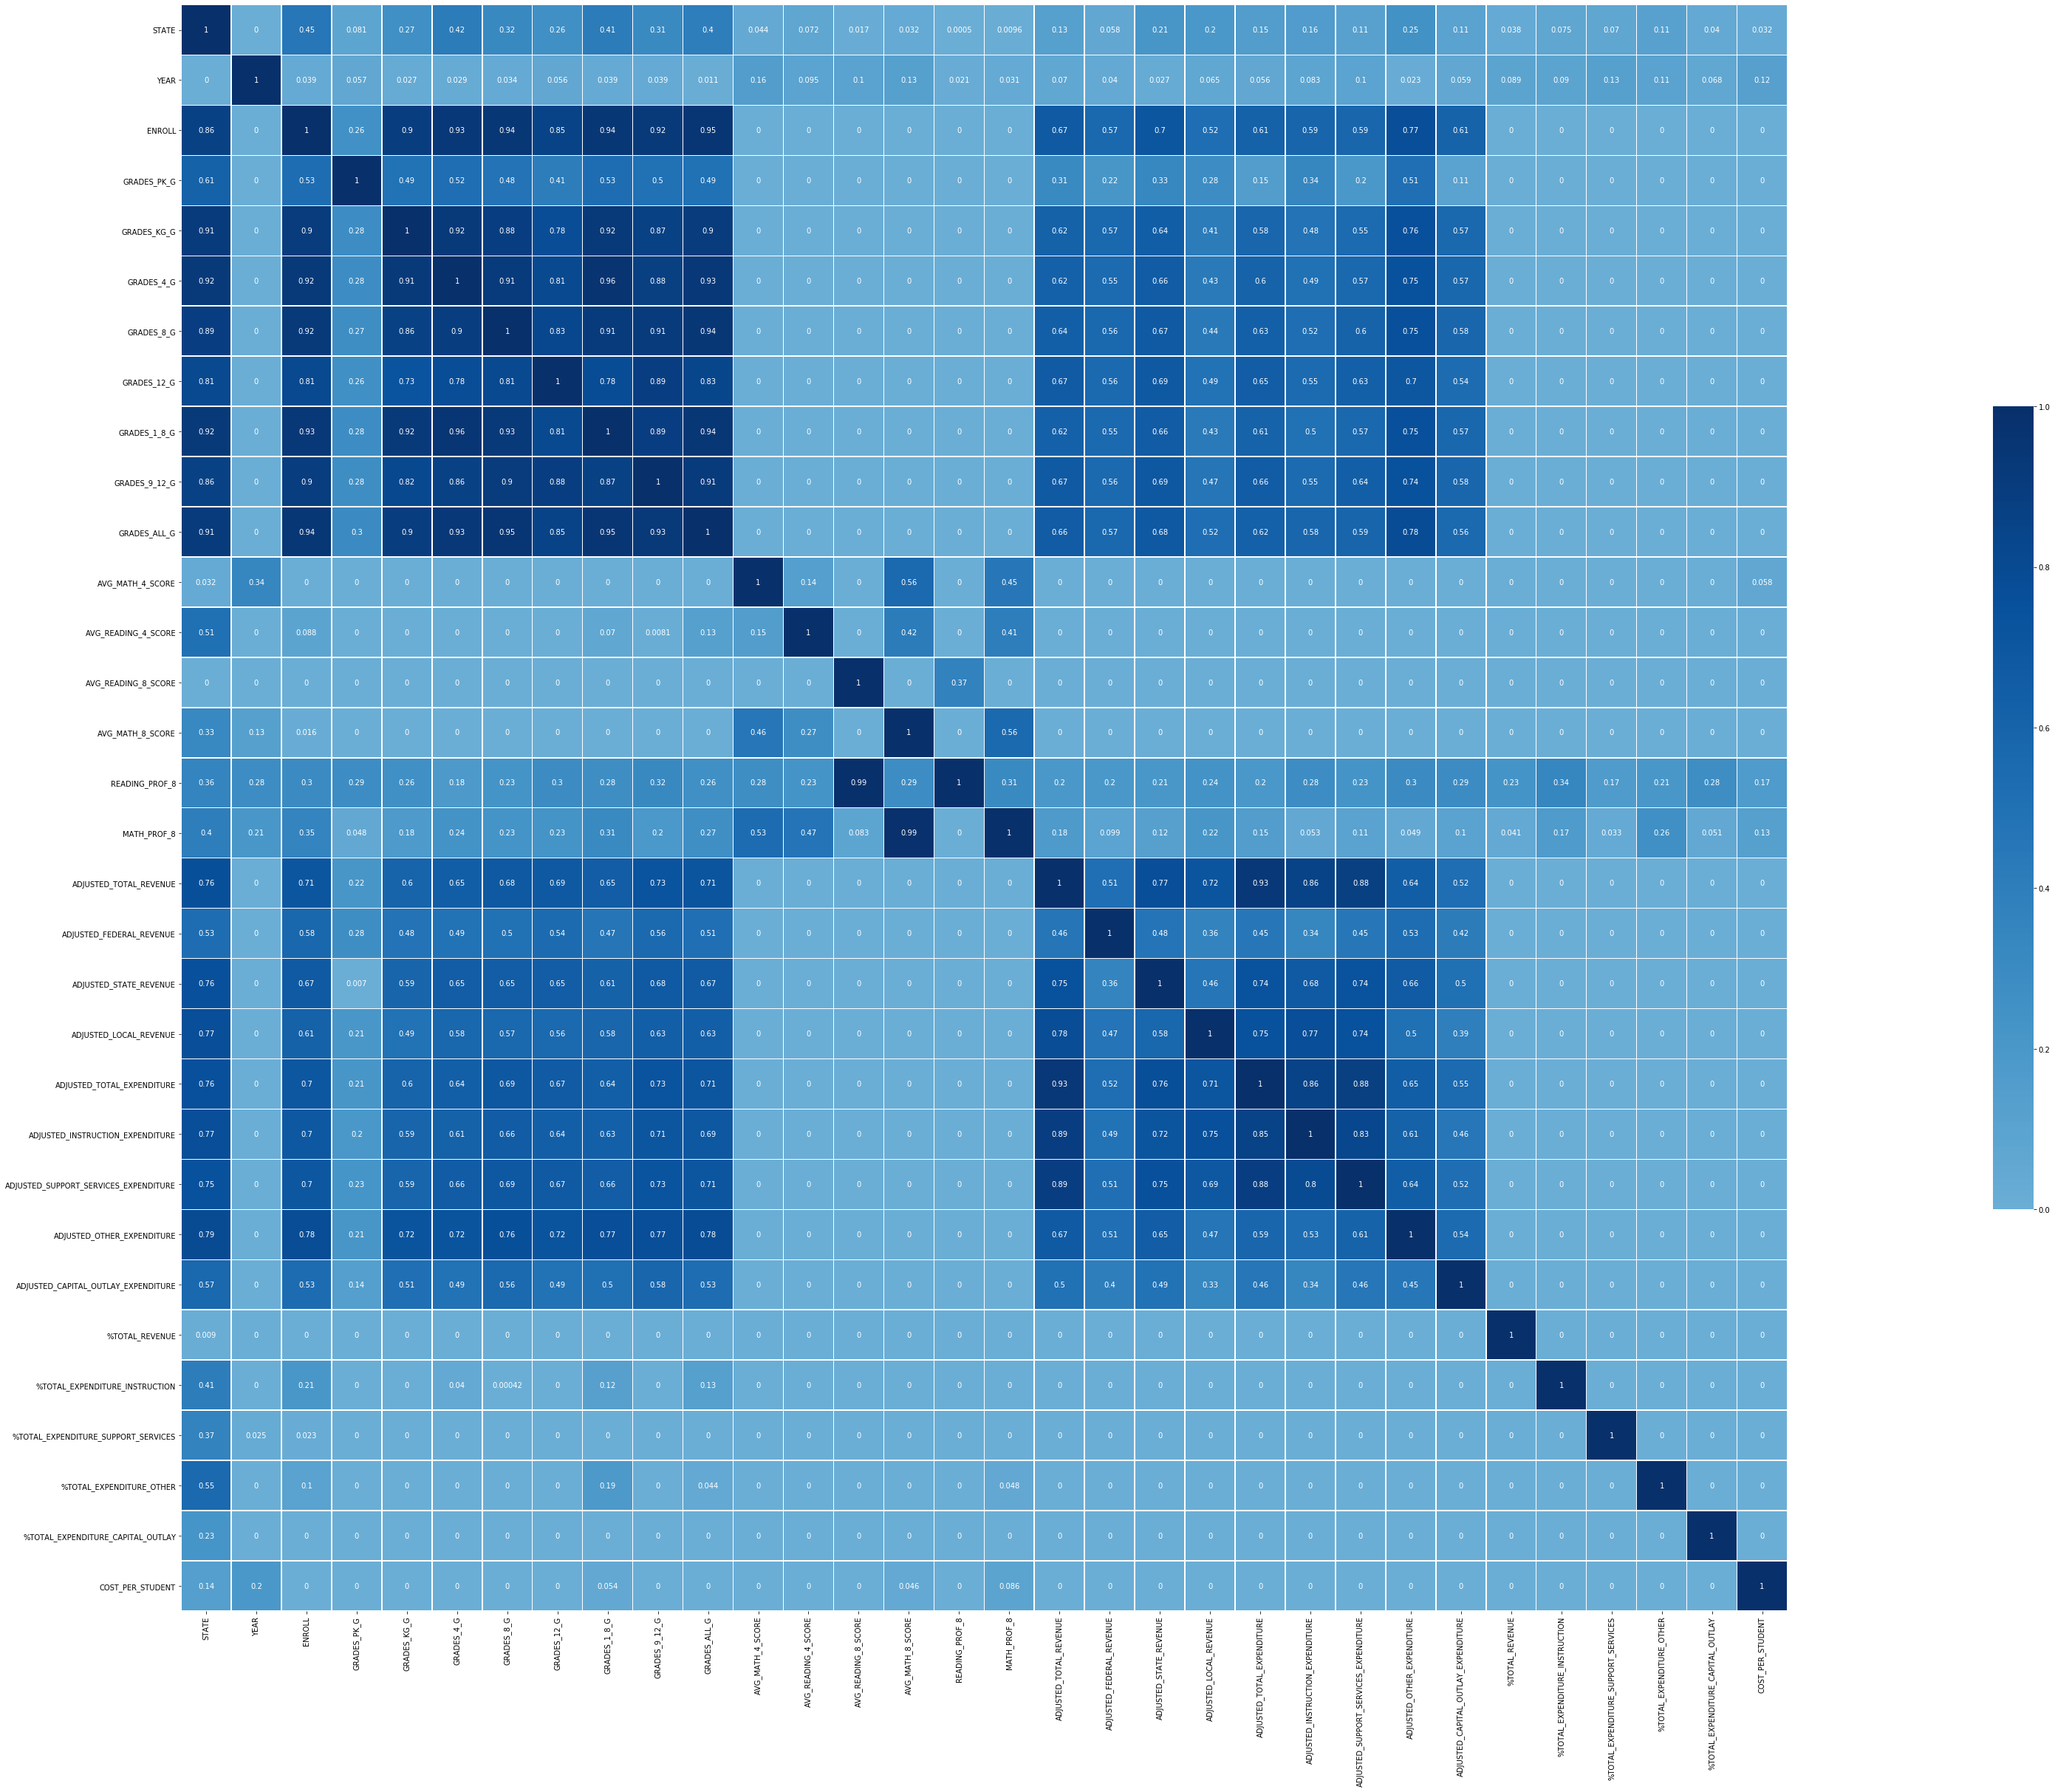

In [61]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(100, 40))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(matrix, cmap='Blues', center=0, annot=True, annot_kws={"size": 10},
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

# ***Fit a Model***

In [62]:
%matplotlib inline
import category_encoders as ce

from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

In [63]:
# Arrange data into X features matrix and y target vector

target = 'READING_PROF_8'
X_train = train.drop(columns=[target,'AVG_READING_8_SCORE'])
y_train = train[target]
X_val = val.drop(columns=[target,'AVG_READING_8_SCORE'])
y_val = val[target]
X_test = test.drop(columns=[target,'AVG_READING_8_SCORE'])
y_test = test[target]

## ***Random Forest***

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rf1 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy = 'mean'),
    RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                           class_weight=None, criterion='entropy',
                           max_depth=25.0, max_features='auto',
                           max_leaf_nodes=None, max_samples=None,
                           min_impurity_decrease=0.0,
                           min_impurity_split=None,
                           min_samples_leaf=0.1,
                           min_samples_split=0.6,
                           min_weight_fraction_leaf=0.0,
                           n_estimators=1000, n_jobs=None,
                           oob_score=False, random_state=42,
                           verbose=0, warm_start=False)
)

#Fit on train, score on val
rf1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['STATE'], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[{'col': 'STATE',
                                          'data_type': dtype('O'),
                                          'mapping': WISCONSIN                1
NEW_JERSEY               2
RHODE_ISLAND             3
OHIO                     4
NEVADA                   5
OKLAHOMA                 6
CALIFORNIA               7
DISTRICT_OF_COLUMBIA     8
KANSAS                   9
CONNECTICUT             10
GEORGIA                 11
NEBRASKA                12
NORTH_DAKOTA            13
OREGON                  14
UT...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=25.0, max_features='auto',
   

In [66]:
# Val accuracy
print('Train Accuracy', rf1.score(X_train, y_train))
print('Validation Accuracy', rf1.score(X_val, y_val))

Train Accuracy 0.6334661354581673
Validation Accuracy 0.5087719298245614


In [67]:
#Test
print('Test Accuracy', rf1.score(X_test, y_test))

Test Accuracy 0.5882352941176471


# ***Visualize Features***

## ***Valdiation Metrics***

In [68]:
processor = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy = 'mean')
)

In [69]:
X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)
X_test_processed = processor.transform(X_test)

In [70]:
X_train_processed.shape, X_val_processed.shape, X_test_processed.shape

((251, 30), (171, 30), (102, 30))

In [71]:
model_rf =  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                           class_weight=None, criterion='entropy',
                           max_depth=25.0, max_features='auto',
                           max_leaf_nodes=None, max_samples=None,
                           min_impurity_decrease=0.0,
                           min_impurity_split=None,
                           min_samples_leaf=0.1,
                           min_samples_split=0.6,
                           min_weight_fraction_leaf=0.0,
                           n_estimators=1000, n_jobs=None,
                           oob_score=False, random_state=42,
                           verbose=0, warm_start=False)




In [72]:
model_rf.fit(X_train_processed, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=25.0, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.1, min_samples_split=0.6,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [73]:
model_rf.score(X_val_processed, y_val)

0.5087719298245614

In [74]:
model_rf.score(X_test_processed, y_test)

0.5882352941176471

### ***Confusion Matrix***

A **confusion matrix** is a table that is used to evaluate the performance of a classification model on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.

In [75]:
conda install -c conda-forge/label/cf201901 scikit-plot

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [76]:
from sklearn.metrics import confusion_matrix

In [77]:
y_pred = model_rf.predict(X_val_processed)

In [78]:
cm = confusion_matrix(y_val, y_pred)
print(cm)

[[ 0  1  1]
 [ 0 49 43]
 [ 0 39 38]]


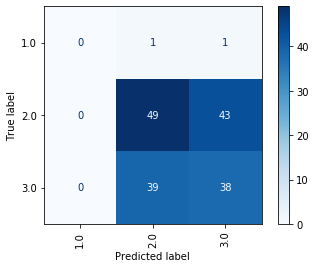

In [79]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model_rf, X_val_processed, y_val, 
                      xticks_rotation='vertical', 
                      values_format='.0f',
                      cmap='Blues');

### ***Permutation Importances***

In [80]:
!pip install eli5

In [81]:
import eli5

In [82]:
from eli5.sklearn import PermutationImportance

In [83]:
permuter = PermutationImportance(
    model_rf,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)
permuter.fit(X_val_processed, y_val)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='entropy',
                                                       max_depth=25.0,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=0.1,
                                                       min_samples_split=0.6,
                                                       min_we

In [84]:
permuter.feature_importances_

array([-7.01754386e-03, -1.28654971e-02, -5.84795322e-03,  5.84795322e-03,
        2.33918129e-03,  1.16959064e-03,  7.01754386e-03,  0.00000000e+00,
        3.33066907e-17,  0.00000000e+00, -2.33918129e-03,  3.50877193e-03,
       -1.16959064e-03,  1.52046784e-02,  7.01754386e-03, -5.84795322e-03,
       -1.87134503e-02, -2.33918129e-03,  3.50877193e-03,  4.67836257e-03,
        2.33918129e-03,  3.50877193e-03, -2.33918129e-03,  4.67836257e-03,
        1.40350877e-02, -2.33918129e-03, -1.16959064e-03, -7.01754386e-03,
        1.16959064e-03, -1.16959064e-03])

In [85]:
eli5.show_weights(
    permuter,
    top = None,
    feature_names = X_val.columns.to_list()
)

Weight,Feature
0.0152 ± 0.0190,AVG_MATH_8_SCORE
0.0140 ± 0.0094,%TOTAL_REVENUE
0.0070 ± 0.0088,MATH_PROF_8
0.0070 ± 0.0088,GRADES_8_G
0.0058 ± 0.0267,GRADES_PK_G
0.0047 ± 0.0155,ADJUSTED_CAPITAL_OUTLAY_EXPENDITURE
0.0047 ± 0.0088,ADJUSTED_TOTAL_EXPENDITURE
0.0035 ± 0.0241,AVG_MATH_4_SCORE
0.0035 ± 0.0057,ADJUSTED_SUPPORT_SERVICES_EXPENDITURE
0.0035 ± 0.0094,ADJUSTED_LOCAL_REVENUE


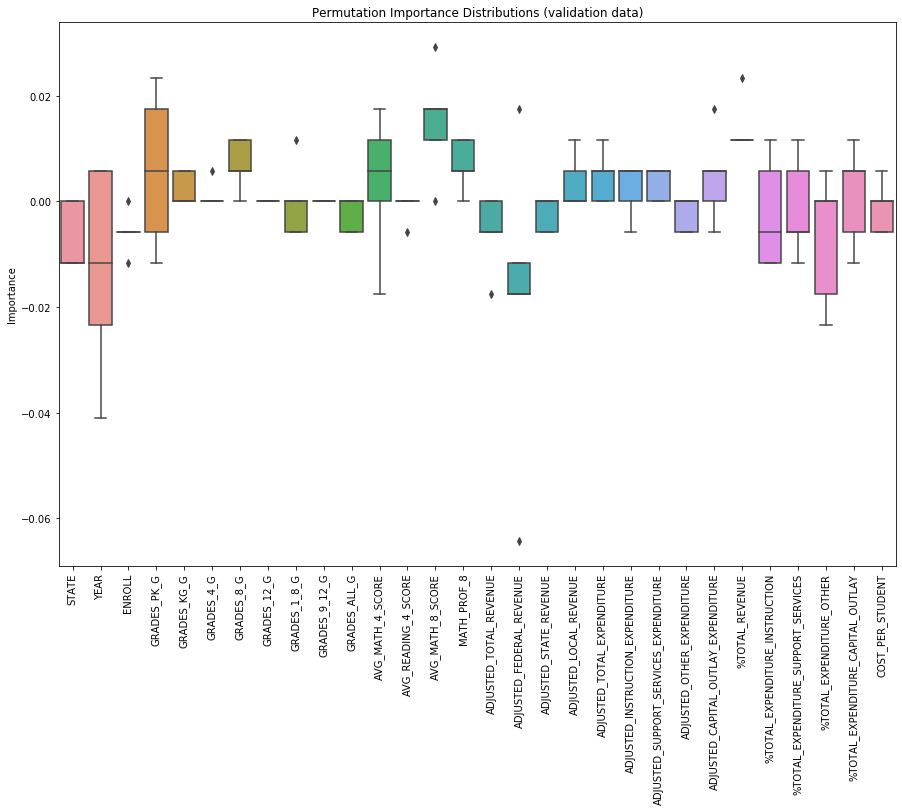

In [86]:
permuter_df = pd.DataFrame(data = permuter.results_, 
                          columns = X_val.columns.to_list())
fig, ax = plt.subplots(figsize =(15, 10))
ax = sns.boxplot(data=permuter_df);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set(title='Permutation Importance Distributions (validation data)',ylabel='Importance');

In [87]:
print('Shape before removing features', X_train.shape)

Shape before removing features (251, 30)


In [88]:
minimum_importance = 0 
mask = permuter.feature_importances_ >= minimum_importance
features = X_train.columns[mask]
X_train_permuted = X_train[features]

In [89]:
print('Shape after removing features:', X_train_permuted.shape)

Shape after removing features: (251, 17)


In [90]:
X_val_permuted = X_val[features]
X_test_permuted = X_test[features]


pipeline_rf = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy = 'mean'),
    RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                           class_weight=None, criterion='entropy',
                           max_depth=25.0, max_features='auto',
                           max_leaf_nodes=None, max_samples=None,
                           min_impurity_decrease=0.0,
                           min_impurity_split=None,
                           min_samples_leaf=0.1,
                           min_samples_split=0.6,
                           min_weight_fraction_leaf=0.0,
                           n_estimators=1000, n_jobs=None,
                           oob_score=False, random_state=42,
                           verbose=0, warm_start=False)
)

# Fit on train, score on val
pipeline_rf.fit(X_train_permuted, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=[], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[], return_df=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('randomforestclassifier',
                 RandomForestClassifier(boo...p_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=25.0, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                               

In [91]:
print('Validation Accuracy:', pipeline_rf.score(X_val_permuted, y_val))

Validation Accuracy: 0.5029239766081871


In [92]:
print('Test Accuracy:', pipeline_rf.score(X_test_permuted, y_test))

Test Accuracy: 0.6078431372549019


### ***Partial Dependence Plot***

In [93]:
!pip install pdpbox

In [94]:
plt.rcParams['figure.dpi'] = 72

#### ***PDP_Isolate***

In [95]:
from pdpbox import pdp
from pdpbox.pdp import pdp_isolate, pdp_plot

In [96]:
X_train.columns

Index(['STATE', 'YEAR', 'ENROLL', 'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G',
       'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G', 'GRADES_9_12_G',
       'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_READING_4_SCORE',
       'AVG_MATH_8_SCORE', 'MATH_PROF_8', 'ADJUSTED_TOTAL_REVENUE',
       'ADJUSTED_FEDERAL_REVENUE', 'ADJUSTED_STATE_REVENUE',
       'ADJUSTED_LOCAL_REVENUE', 'ADJUSTED_TOTAL_EXPENDITURE',
       'ADJUSTED_INSTRUCTION_EXPENDITURE',
       'ADJUSTED_SUPPORT_SERVICES_EXPENDITURE', 'ADJUSTED_OTHER_EXPENDITURE',
       'ADJUSTED_CAPITAL_OUTLAY_EXPENDITURE', '%TOTAL_REVENUE',
       '%TOTAL_EXPENDITURE_INSTRUCTION', '%TOTAL_EXPENDITURE_SUPPORT_SERVICES',
       '%TOTAL_EXPENDITURE_OTHER', '%TOTAL_EXPENDITURE_CAPITAL_OUTLAY',
       'COST_PER_STUDENT'],
      dtype='object')

In [97]:
min(X_train['ADJUSTED_INSTRUCTION_EXPENDITURE']), max(X_train['ADJUSTED_INSTRUCTION_EXPENDITURE'])

(394082.4127586384, 42533216.014079854)

In [98]:
feature = 'ADJUSTED_INSTRUCTION_EXPENDITURE'

isolated = pdp_isolate(
    model = rf1, 
    dataset = X_val, 
    model_features = X_val.columns, 
    feature = feature,
    num_grid_points = 50
)

(0, 10)

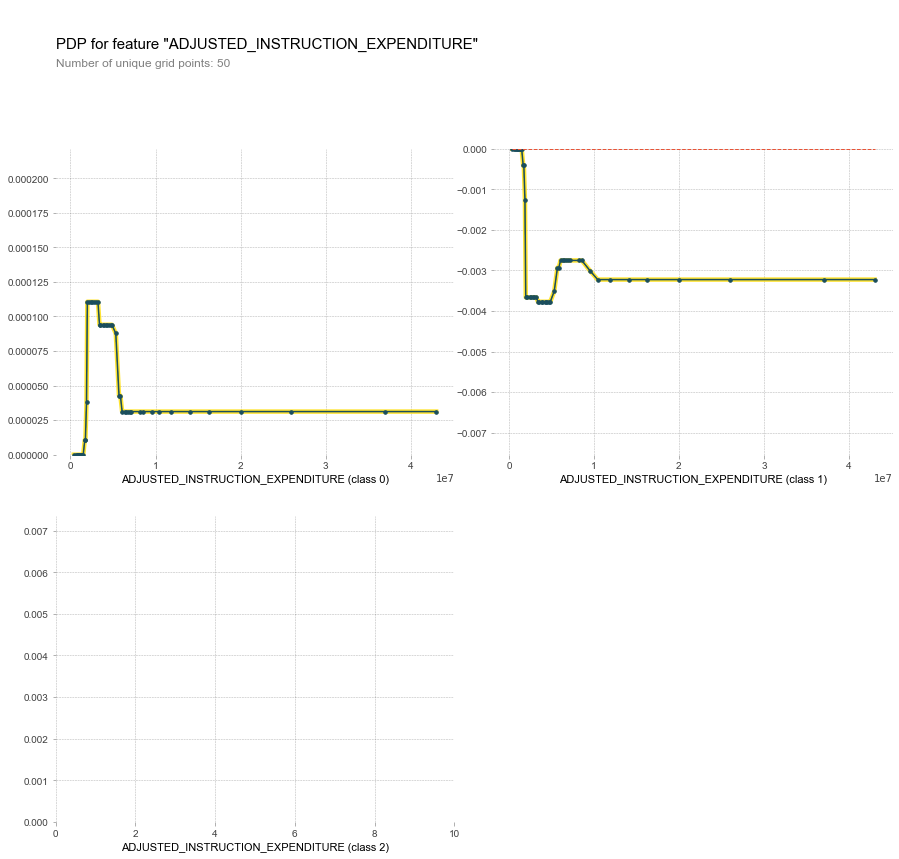

In [99]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=100)
plt.xlim(0, 10)

#### ***Feature Interaction***

In [100]:
!pip install PDPbox

In [101]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot
import seaborn as sns

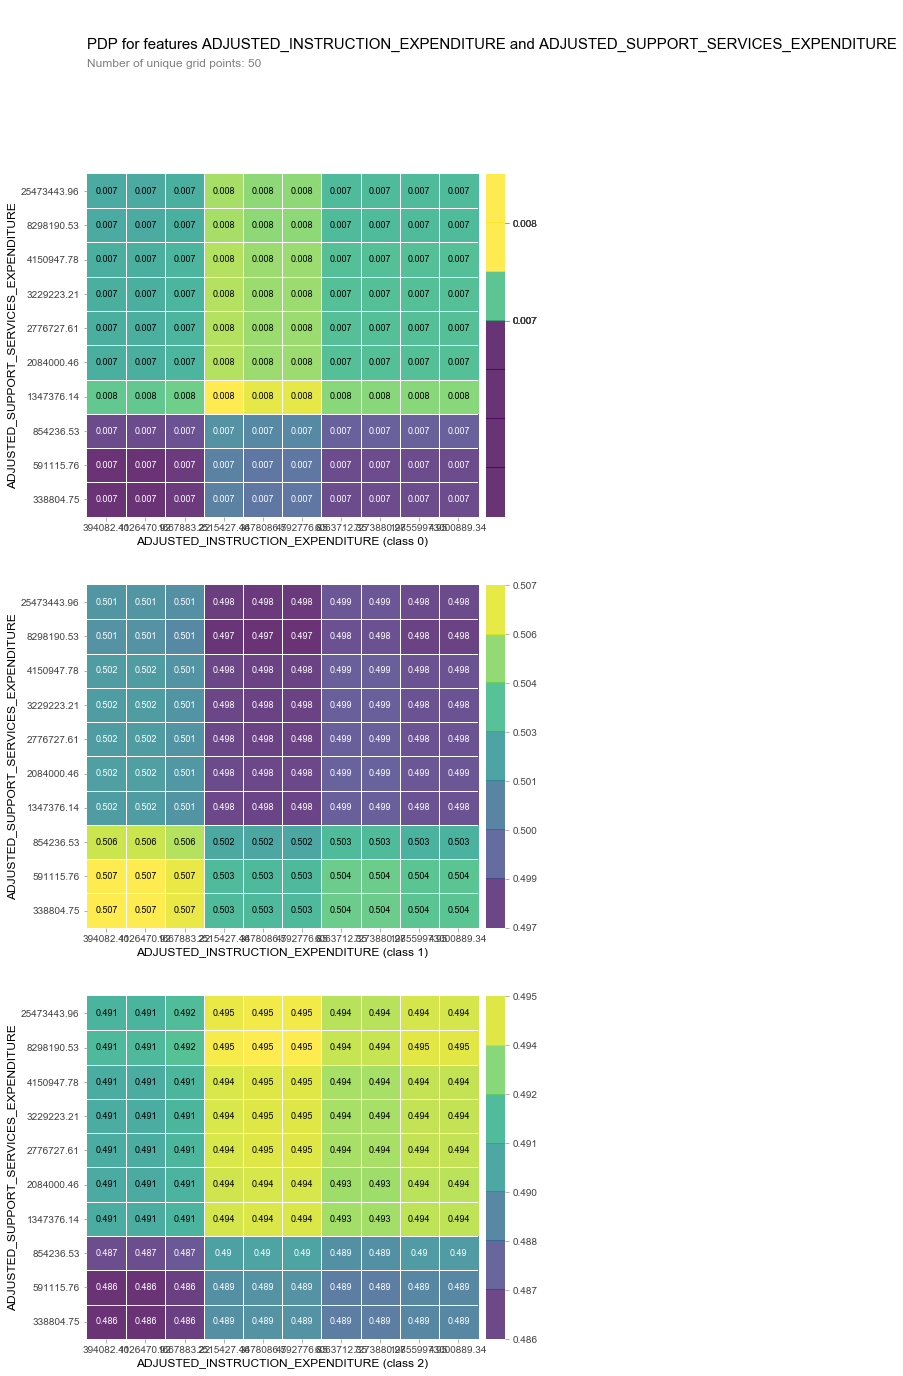

In [102]:
features= 'ADJUSTED_INSTRUCTION_EXPENDITURE','ADJUSTED_SUPPORT_SERVICES_EXPENDITURE'
n_grids = 50

interaction = pdp_interact(
    model = rf1,
    dataset=X_val,
    model_features=X_val.columns,
    features=features
)

plot_params = {
                # plot title and subtitle
                'title': 'PDP for features %s and %s' % features,
                'subtitle': "Number of unique grid points: %d" % n_grids,
                'title_fontsize': 15,
                'subtitle_fontsize': 12,
                'font_family': 'Arial',
                # matplotlib color map for ICE lines
                'line_cmap': 'Blues',
                'xticks_rotation': 45,
                # pdp line color, highlight color and line width
                'pdp_color': '#1A4E5D',
                'pdp_hl_color': '#FEDC00',
                'pdp_linewidth': 1.5,
                # horizon zero line color and with
                'zero_color': '#E75438',
                'zero_linewidth': 1,
                # pdp std fill color and alpha
                'fill_color': '#66C2D7',
                'fill_alpha': 0.2,
                # marker size for pdp line
                'markersize': 3.5,
            }

pdp_interact_plot(interaction, 
                  features, 
                  plot_type='grid',
                  x_quantile=False,
                  ncols=1,
                  plot_params = plot_params
                  );

### Shapley Value

In [103]:
!pip install shap

In [104]:
import shap

In [105]:
# Get an individual observation to explain.
# For example, the 0th row from the test set.
row = X_test.iloc[[0]]
row

,STATE,YEAR,ENROLL,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,...,ADJUSTED_INSTRUCTION_EXPENDITURE,ADJUSTED_SUPPORT_SERVICES_EXPENDITURE,ADJUSTED_OTHER_EXPENDITURE,ADJUSTED_CAPITAL_OUTLAY_EXPENDITURE,%TOTAL_REVENUE,%TOTAL_EXPENDITURE_INSTRUCTION,%TOTAL_EXPENDITURE_SUPPORT_SERVICES,%TOTAL_EXPENDITURE_OTHER,%TOTAL_EXPENDITURE_CAPITAL_OUTLAY,COST_PER_STUDENT
1178,ALABAMA,2015,734974.0,13230.0,55613.0,55808.0,55792.0,50668.0,452764.0,222182.0,...,4.117701e+06,2.604775e+06,641019.880139,550206.67204,1.019235,0.508875,0.321904,0.079219,0.067996,10.20689


In [106]:
y_test.iloc[[0]]

1178    3.0
Name: READING_PROF_8, dtype: float64

In [107]:
explainer=shap.TreeExplainer(model_rf, feature_perturbation='interventional')
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed, check_additivity = False, approximate=False)

In [108]:
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[1],
    shap_values=shap_values[1],
    features=row,
    link='logit'               # For classification, this returns predicted probs
)

In [109]:
#Explanations for the whole X_val dataset

explainer = shap.TreeExplainer(model_rf)

shap_values = explainer.shap_values(X_val_processed, check_additivity=False)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[1],
    shap_values=shap_values[1],
    features=X_val_processed,
    feature_names = features
)


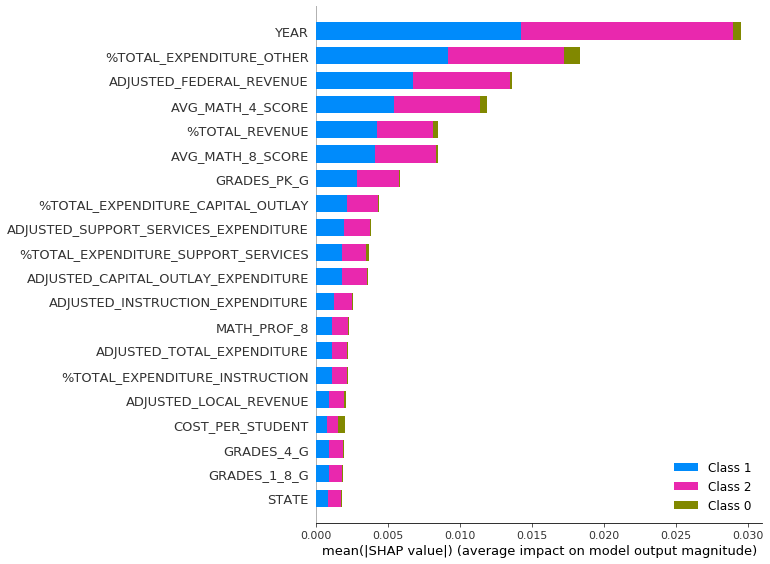

In [110]:
shap.summary_plot(shap_values, X_val, auto_size_plot=False)